## Uber Trip Analysis

In [1]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

In [5]:
# Display first few rows
print(df.head())

  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537


In [7]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None
dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


In [9]:
# Rename columns to lowercase and strip whitespace
df.columns = df.columns.str.strip().str.lower()

In [13]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [15]:
# Extract datetime features
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month

In [22]:
# Check for duplicates
df = df.drop_duplicates()

In [24]:
# Drop rows with any null values
df = df.dropna()

In [26]:
# Display first few rows
print(df.head())

  dispatching_base_number       date  active_vehicles  trips  hour  day  \
0                  B02512 2015-01-01              190   1132     0    1   
1                  B02765 2015-01-01              225   1765     0    1   
2                  B02764 2015-01-01             3427  29421     0    1   
3                  B02682 2015-01-01              945   7679     0    1   
4                  B02617 2015-01-01             1228   9537     0    1   

    weekday  month  
0  Thursday      1  
1  Thursday      1  
2  Thursday      1  
3  Thursday      1  
4  Thursday      1  


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

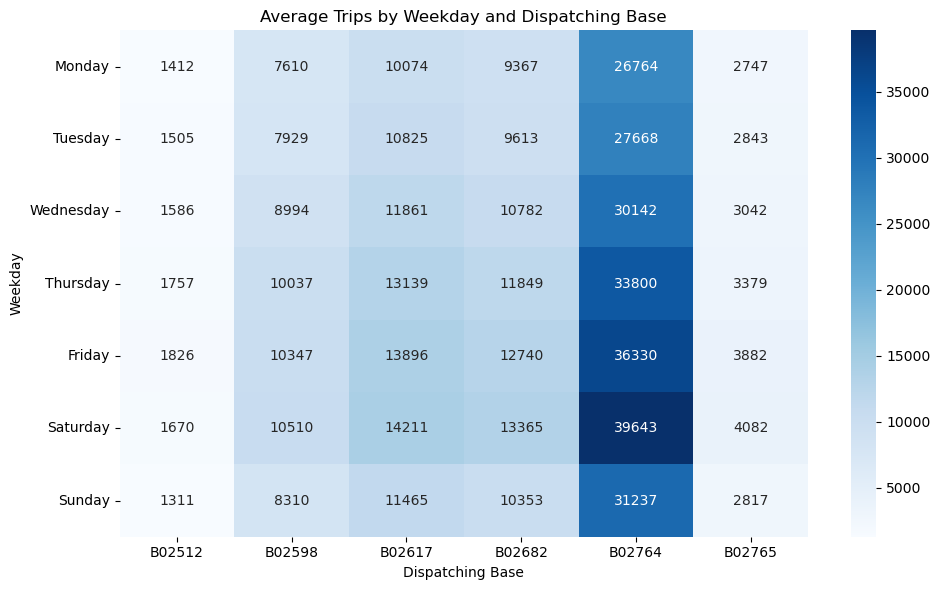

In [42]:
# Group by weekday and base
pivot_table = df.groupby(['weekday', 'dispatching_base_number'])['trips'].mean().unstack()

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Average Trips by Weekday and Dispatching Base")
plt.xlabel("Dispatching Base")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

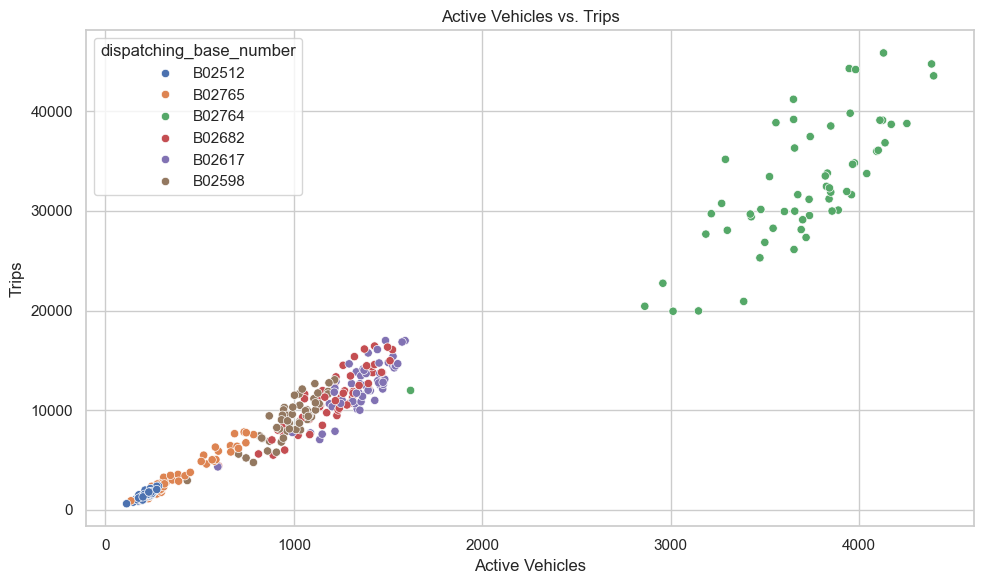

In [80]:
# Active Vehicles VS. Trips
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="active_vehicles", y="trips", hue="dispatching_base_number")
plt.title("Active Vehicles vs. Trips")
plt.xlabel("Active Vehicles")
plt.ylabel("Trips")
plt.tight_layout()
plt.show()

df.to_csv("Uber-Jan-Feb-Cleaned.csv", index=False)